In [15]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from RF_Spectral_Classification_and_Regression import *

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
def shape_classification_binary(training_set_spectrum, training_set_lables, test_set_spectrum, test_set_labels, 
                                num_trees, shapes):
    for shape in shapes: 
        if shape == 'Geometry_parallelepiped':
            labels_train_shape_parallelepiped = labels_train.drop(columns = ['index','log Area/Vol', 'ShortestDim', 
                                                                             'MiddleDim', 'LongDim', 'Material_SiN', 
                                                                             'Material_SiO2', 'Material_Au', 'Geometry_sphere', 
                                                                             'Geometry_wire', 'Geometry_TriangPrismIsosc'])
            labels_test_shape_parallelepiped = labels_test.drop(columns = ['index','log Area/Vol', 'ShortestDim', 
                                                                             'MiddleDim', 'LongDim', 'Material_SiN', 
                                                                             'Material_SiO2', 'Material_Au', 'Geometry_sphere', 
                                                                             'Geometry_wire', 'Geometry_TriangPrismIsosc'])
            labels_train_shape_parallelepiped_as_array = np.asarray(labels_train_shape_parallelepiped) 
            labels_test_shape_parallelepiped_as_array = np.asarray(labels_test_shape_parallelepiped) 
            
            
            print("Training rf_parallelepiped")
            rf_parallelepiped = RandomForestClassifier(n_estimators=num_trees)
            rf_parallelepiped.fit(spectra_train, np.ravel(labels_train_shape_parallelepiped_as_array))
            rf_parallelepiped_accuracy = rf_parallelepiped.score(spectra_test, labels_test_shape_parallelepiped_as_array)
            rf_parallelepiped_predictions = rf_parallelepiped.predict(spectra_test)
            rf_parallelepiped_cm = confusion_matrix(labels_test_shape_parallelepiped_as_array, rf_parallelepiped_predictions)

        if shape == 'Geometry_TriangPrismIsosc':
            labels_train_shape_triangle = labels_train.drop(columns = ['index','log Area/Vol', 'ShortestDim', 
                                                                             'MiddleDim', 'LongDim', 'Material_SiN', 
                                                                             'Material_SiO2', 'Material_Au', 'Geometry_sphere', 
                                                                             'Geometry_wire', 'Geometry_parallelepiped'])
            labels_test_shape_triangle = labels_test.drop(columns = ['index','log Area/Vol', 'ShortestDim', 
                                                                             'MiddleDim', 'LongDim', 'Material_SiN', 
                                                                             'Material_SiO2', 'Material_Au', 'Geometry_sphere', 
                                                                             'Geometry_wire', 'Geometry_parallelepiped'])
            
            labels_train_shape_triangle_as_array = np.asarray(labels_train_shape_triangle) 
            labels_test_shape_triangle_as_array = np.asarray(labels_test_shape_triangle) 
            
            print("Training rf_triangle")
            rf_triangle = RandomForestClassifier(n_estimators=num_trees)
            rf_triangle.fit(spectra_train, np.ravel(labels_train_shape_triangle_as_array))
            rf_triangle_accuracy = rf_triangle.score(spectra_test, labels_test_shape_triangle_as_array)
            rf_triangle_predictions = rf_triangle.predict(spectra_test)
            rf_triangle_cm = confusion_matrix(labels_test_shape_triangle_as_array, rf_triangle_predictions)
            
        if shape == 'Geometry_wire':
            labels_train_shape_wire = labels_train.drop(columns = ['index','log Area/Vol', 'ShortestDim', 
                                                                             'MiddleDim', 'LongDim', 'Material_SiN', 
                                                                             'Material_SiO2', 'Material_Au', 'Geometry_sphere', 
                                                                             'Geometry_TriangPrismIsosc', 'Geometry_parallelepiped'])
            labels_test_shape_wire = labels_test.drop(columns = ['index','log Area/Vol', 'ShortestDim', 
                                                                             'MiddleDim', 'LongDim', 'Material_SiN', 
                                                                             'Material_SiO2', 'Material_Au', 'Geometry_sphere', 
                                                                             'Geometry_TriangPrismIsosc', 'Geometry_parallelepiped'])
            
            labels_train_shape_wire_as_array = np.asarray(labels_train_shape_wire) 
            labels_test_shape_wire_as_array = np.asarray(labels_test_shape_wire) 
            
            print("Training rf_wire")
            rf_wire = RandomForestClassifier(n_estimators=num_trees)
            rf_wire.fit(spectra_train, np.ravel(labels_train_shape_wire_as_array))
            rf_wire_accuracy = rf_wire.score(spectra_test, labels_test_shape_wire_as_array)
            rf_wire_predictions = rf_wire.predict(spectra_test)
            rf_wire_cm = confusion_matrix(labels_test_shape_wire_as_array, rf_wire_predictions)

        if shape == 'Geometry_sphere':
            labels_train_shape_sphere = labels_train.drop(columns = ['index','log Area/Vol', 'ShortestDim', 
                                                                             'MiddleDim', 'LongDim', 'Material_SiN', 
                                                                             'Material_SiO2', 'Material_Au', 'Geometry_wire', 
                                                                             'Geometry_TriangPrismIsosc', 'Geometry_parallelepiped'])
            labels_test_shape_sphere = labels_test.drop(columns = ['index','log Area/Vol', 'ShortestDim', 
                                                                             'MiddleDim', 'LongDim', 'Material_SiN', 
                                                                             'Material_SiO2', 'Material_Au', 'Geometry_wire', 
                                                                             'Geometry_TriangPrismIsosc', 'Geometry_parallelepiped'])
            labels_train_shape_sphere_as_array = np.asarray(labels_train_shape_sphere) 
            labels_test_shape_sphere_as_array = np.asarray(labels_test_shape_sphere) 
            
            print("Training rf_sphere")
            rf_sphere = RandomForestClassifier(n_estimators=num_trees)
            rf_sphere.fit(spectra_train, np.ravel(labels_train_shape_sphere_as_array))
            rf_sphere_accuracy = rf_sphere.score(spectra_test, labels_test_shape_sphere_as_array)
            rf_sphere_predictions = rf_sphere.predict(spectra_test)
            rf_sphere_cm = confusion_matrix(labels_test_shape_sphere_as_array, rf_sphere_predictions)

    

    return[["parallelepiped", rf_parallelepiped_accuracy, rf_parallelepiped_predictions, rf_parallelepiped_cm, labels_test_shape_parallelepiped_as_array],
           ["sphere", rf_sphere_accuracy, rf_sphere_predictions, rf_sphere_cm, labels_test_shape_sphere_as_array],
           ["triangle", rf_triangle_accuracy, rf_triangle_predictions, rf_triangle_cm, labels_test_shape_triangle_as_array],
           ["wire", rf_wire_accuracy, rf_wire_predictions, rf_wire_cm, labels_test_shape_wire_as_array]]

In [21]:
spectra_train = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/y_new_train.joblib')
spectra_test = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/y_test.joblib')
labels_train = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/x_new_train.joblib').reset_index()
labels_test = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/x_test.joblib').reset_index()
labels_train_smaller = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/x_train.joblib').reset_index()
spectra_train_smaller = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/y_train.joblib')

In [22]:
from_one_hot_dict = {(1.,0.,0.,0.) : 0, (0.,1.,0.,0.) : 1, (0.,0.,1.,0.) : 2, (0.,0.,0.,1.) : 3}
from_one_hot_dict_materials = {(1.,0.,0.) : 0, (0.,1.,0.) : 1, (0.,0.,1.) : 2}

In [23]:
rf_Au = Train_Random_Forests_Shape_Classification("Au", spectra_train, labels_train, spectra_test, labels_test,from_one_hot_dict, 50)
rf_SiN = Train_Random_Forests_Shape_Classification("SiN", spectra_train, labels_train, spectra_test, labels_test,from_one_hot_dict, 50)
rf_SiO2 = Train_Random_Forests_Shape_Classification("SiO2", spectra_train, labels_train, spectra_test, labels_test,from_one_hot_dict, 50)
rf_all = Train_Random_Forests_Shape_Classification("All", spectra_train, labels_train, spectra_test, labels_test,from_one_hot_dict, 50)

training Au
training SiN
training SiO2
training shape classifier all materials


In [32]:
joblib.dump([["RF Model SiO2", rf_SiO2], ["RF Model SiO2",rf_SiN], ["RF Model SiO2", rf_Au], ["RF all materials", rf_all]], 
           "RF_Models_Shape_Classification.joblib")

['RF_Models_Shape_Classification.joblib']

In [35]:
shape_classificaion_shapes = ['Geometry_sphere', 'Geometry_wire', 'Geometry_TriangPrismIsosc', 'Geometry_parallelepiped']
Binary_Classification = shape_classification_binary(spectra_train, labels_train, spectra_test, labels_test, 50, shape_classificaion_shapes)

Training rf_sphere
Training rf_wire
Training rf_triangle
Training rf_parallelepiped


In [36]:
print(Binary_Classification[0][1])
print(Binary_Classification[1][1])
print(Binary_Classification[2][1])
print(Binary_Classification[3][1])

0.7564315883783438
0.9988480737232817
0.8332266734928965
0.8547292973249712


In [39]:
joblib.dump(Binary_Classification, "RF Binary Classification Models.joblib")

['RF Binary Classification Models.joblib']

In [30]:
rf_size_regression = Train_Random_Forests_Size_Regression("all", spectra_train, labels_train, spectra_test, labels_test, 50)

In [38]:
print(rf_size_regression)
joblib.dump(rf_size_regression, "RF Size Regression.joblib")

(0.9055853492847894, MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=50,
                          

['RF Size Regression.joblib']

In [43]:
labels_test_shape = labels_test.drop(columns = ['index','log Area/Vol', 'ShortestDim', 'MiddleDim', 'LongDim', 
                                                'Geometry_sphere', 'Geometry_wire', 'Geometry_TriangPrismIsosc', 
                                                'Geometry_parallelepiped', 'index'])
indicies_to_drop_test_list_SiO2 = drop_indicies(labels_test_shape, 'Material_SiO2', 0, False)
indicies_to_drop_test_list_SiN = drop_indicies(labels_test_shape, 'Material_SiN', 0, False)
indicies_to_drop_test_list_Au = drop_indicies(labels_test_shape, 'Material_Au', 0, False)

In [59]:
labels_test_size = labels_test.drop(columns = ['index', 'Geometry_sphere', 'Geometry_wire', 'Geometry_TriangPrismIsosc', 
                                            'Geometry_parallelepiped', 'index', 'Material_Au', 'Material_SiN', 'Material_SiO2'])
spectra_test_df = pd.DataFrame(spectra_test)
spectra_test_SiO2 = np.asarray(spectra_test_df.drop(indicies_to_drop_test_list_SiO2[1]))
spectra_test_SiN = np.asarray(spectra_test_df.drop(indicies_to_drop_test_list_SiN[1]))
spectra_test_Au = np.asarray(spectra_test_df.drop(indicies_to_drop_test_list_Au[1]))

In [64]:
labels_test_size_SiO2 = labels_test_size.drop(indicies_to_drop_test_list_SiO2[1])
labels_test_size_SiN = labels_test_size.drop(indicies_to_drop_test_list_SiN[1])
labels_test_size_Au = labels_test_size.drop(indicies_to_drop_test_list_Au[1])

accuracy_size_regression_SiO2 = rf_size_regression[1].score(spectra_test_SiO2, labels_test_size_SiO2)
accuracy_size_regression_SiN =rf_size_regression[1].score(spectra_test_SiN, labels_test_size_SiN)
accuracy_size_regression_Au =rf_size_regression[1].score(spectra_test_Au, labels_test_size_Au)

0.9153275659644005
0.9098296385176912
0.8962104407674369


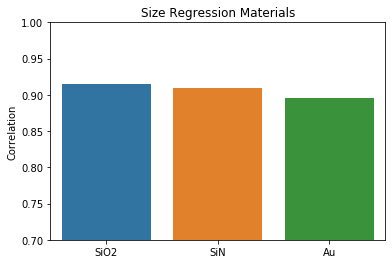

In [73]:
print(accuracy_size_regression_SiO2)
print(accuracy_size_regression_SiN)
print(accuracy_size_regression_Au)

accuracies = [accuracy_size_regression_SiO2, accuracy_size_regression_SiN, accuracy_size_regression_Au]
categories = ["SiO2", "SiN", "Au"]
title = "Size Regression Materials"

sns.barplot(categories, accuracies).set(title = title, ylabel = "Correlation", ylim = [0.7, 1])
plt.savefig(str(title) + '.png', format='png')


In [ ]:
indicies_to_drop_test_list_Parallelepiped = drop_indicies(labels_test, 'Geometry_parallelepiped', 0, False)
indicies_to_drop_test_list_Sphere = drop_indicies(labels_test, 'Geometry_sphere', 0, False)
indicies_to_drop_test_list_Triangle = drop_indicies(labels_test, 'Geometry_TriangPrismIsosc', 0, False)
indicies_to_drop_test_list_Wire = drop_indicies(labels_test, 'Geometry_wire', 0, False)

labels_test_size_Parallelepiped = labels_test_size.drop(indicies_to_drop_test_list_Parallelepiped[1])
labels_test_size_Sphere = labels_test_size.drop(indicies_to_drop_test_list_Sphere[1])
labels_test_size_Triangle = labels_test_size.drop(indicies_to_drop_test_list_Triangle[1])
labels_test_size_Wire = labels_test_size.drop(indicies_to_drop_test_list_Wire[1])

spectra_test_Parallelepiped = spectra_test_df.drop(indicies_to_drop_test_list_Parallelepiped[1])
spectra_test_Sphere = spectra_test_df.drop(indicies_to_drop_test_list_Sphere[1])
spectra_test_Triangle = spectra_test_df.drop(indicies_to_drop_test_list_Triangle[1])
spectra_test_Wire = spectra_test_df.drop(indicies_to_drop_test_list_Wire[1])


In [ ]:
accuracy_size_regression_Parallelepiped = rf_size_regression[1].score(spectra_test_Parallelepiped, labels_test_size_Parallelepiped)
accuracy_size_regression_Sphere = rf_size_regression[1].score(spectra_test_Sphere, labels_test_size_Sphere)
accuracy_size_regression_Triangle = rf_size_regression[1].score(spectra_test_Triangle, labels_test_size_Triangle)
accuracy_size_regression_Wire = rf_size_regression[1].score(spectra_test_Wire, labels_test_size_Wire)


In [ ]:
print(accuracy_size_regression_Parallelepiped)
print(accuracy_size_regression_Sphere)
print(accuracy_size_regression_Triangle)
print(accuracy_size_regression_Wire)

In [ ]:
accuracies = [accuracy_size_regression_Triangle, accuracy_size_regression_Parallelepiped, accuracy_size_regression_Sphere,
             accuracy_size_regression_Wire]
categories = ["Triangle", "Parallelepiped", "Sphere", "Wire"]
title = "Size Regression Shapes"

sns.barplot(categories, accuracies).set(title = title, ylabel = "Correlation", ylim = [0.7, 1])
plt.savefig(str(title) + '.png', format='png')

In [68]:
accuracy_size_regression_Parallelepiped = rf_size_regression[1].score(spectra_test_Parallelepiped, labels_test_size_Parallelepiped)
accuracy_size_regression_Sphere = rf_size_regression[1].score(spectra_test_Sphere, labels_test_size_Sphere)
accuracy_size_regression_Triangle = rf_size_regression[1].score(spectra_test_Triangle, labels_test_size_Triangle)
accuracy_size_regression_Wire = rf_size_regression[1].score(spectra_test_Wire, labels_test_size_Wire)


In [69]:
print(accuracy_size_regression_Parallelepiped)
print(accuracy_size_regression_Sphere)
print(accuracy_size_regression_Triangle)
print(accuracy_size_regression_Wire)

0.8476311181957068
0.9982124509810619
0.904830891572806
0.8841586009238462


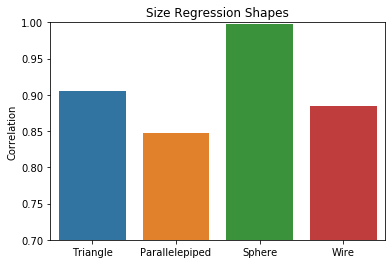

In [75]:
accuracies = [accuracy_size_regression_Triangle, accuracy_size_regression_Parallelepiped, accuracy_size_regression_Sphere,
             accuracy_size_regression_Wire]
categories = ["Triangle", "Parallelepiped", "Sphere", "Wire"]
title = "Size Regression Shapes"

sns.barplot(categories, accuracies).set(title = title, ylabel = "Correlation", ylim = [0.7, 1])
plt.savefig(str(title) + '.png', format='png')